In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score


In [3]:
data = pd.read_csv("ad_10000records.csv")
print(data.head())


   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country            Timestamp  Clicked on Ad  
0  Svalbard & Jan Mayen Islands  2016-06-09 21:43:05              0  
1                     Si

In [4]:
print(data["Clicked on Ad"].value_counts())

# Click through rate
click_through_rate = 4917 / 10000 * 100
print(f"The click through rate is: {click_through_rate}%")


Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64
The click through rate is: 49.17%


In [5]:
le = LabelEncoder()

data["Gender"] = le.fit_transform(data["Gender"])


In [6]:
# Taking the first seven columns of the dataset as features
x=data.iloc[:,0:7]
# Dropping the Categorical Variables
x=x.drop(['Ad Topic Line','City'],axis=1)

# Assigning the final variable as the target variable
y=data.iloc[:,9]
# Using train test split to split the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
# XGBoostClassifier model
model = xgb(random_state=42)

# Training the model
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [8]:
# Predicting test dataset values with the model
y_pred = model.predict(x_test)

# Accuracy check of the model prediction
print("The model accuracy is", accuracy_score(y_test,y_pred))


The model accuracy is 0.793


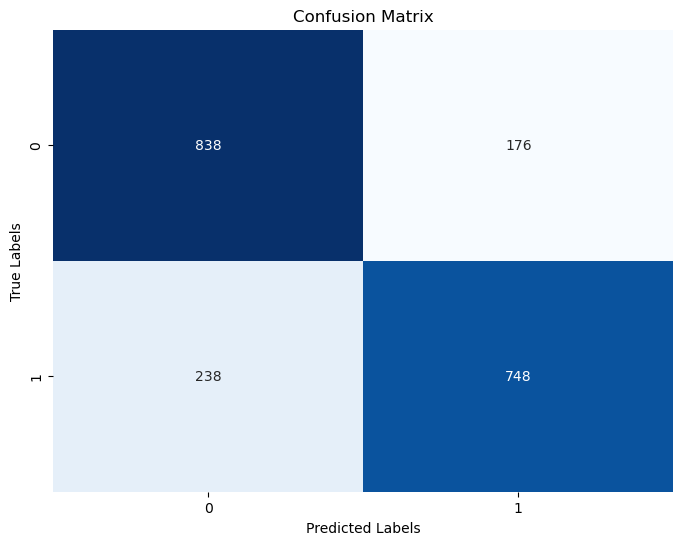

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


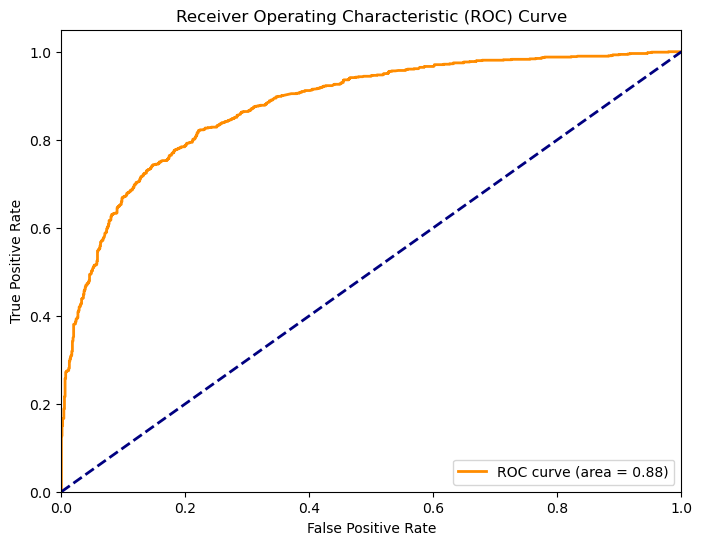

In [13]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


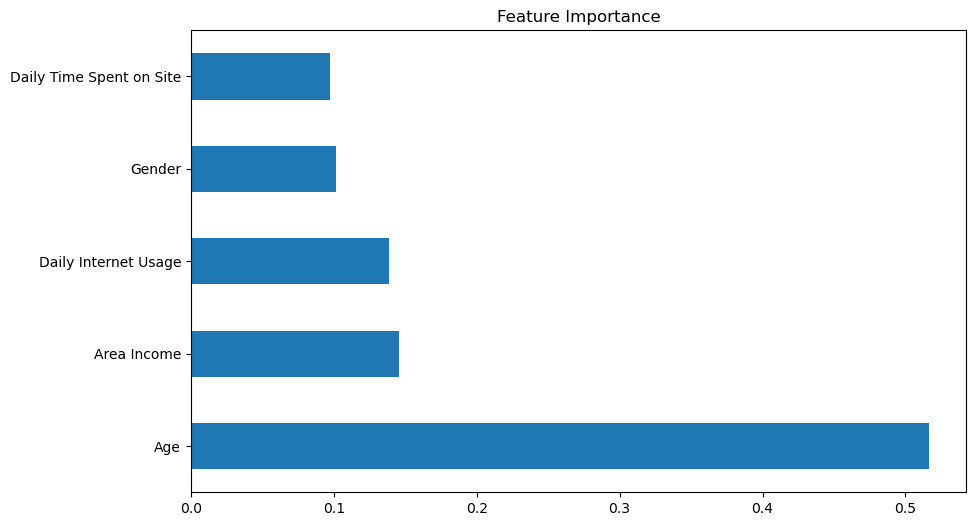

In [14]:
# Feature importance plot
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()


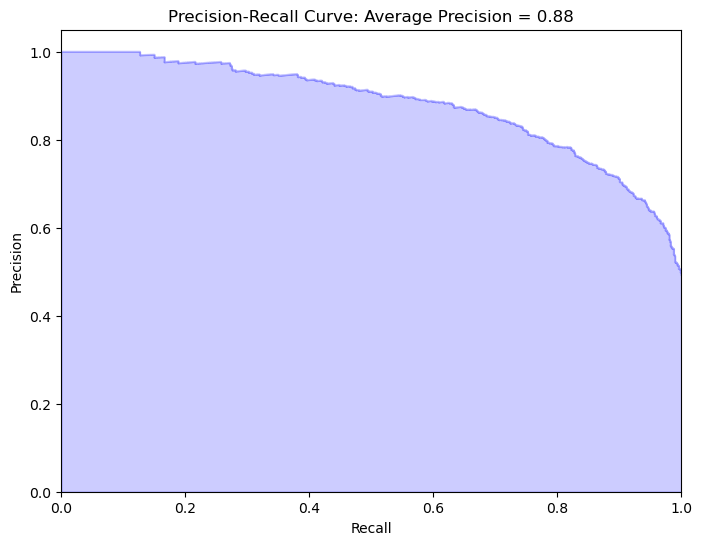

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(x_test)[:,1])
avg_precision = average_precision_score(y_test, model.predict_proba(x_test)[:,1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: Average Precision = {avg_precision:.2f}')
plt.show()
